# Customer Behavior Analysis

## What is customer behavior?
The decisions and instincts that make a customer buy a certain product or service can be described as customer behavior.

## The dataset
The dataset used in this project was made by collecting information from an e-commerce store with products in multiple categories. The data is only for the months of October and November for the year **2019**. The dataset description can be found [here](https://www.kaggle.com/datasets/mkechinov/ecommerce-behavior-data-from-multi-category-store).


In [2]:
import pandas as pd

## Working with large CSV files in Python

In [3]:
import time

### Using Pandas chunksize

In [3]:
# Time taken to read data
s_time_chunk = time.time()

# Using Pandas read_csv(chunksize) function
chunk = pd.read_csv('../cBADatasets/2019-Oct.csv', chunksize=10000)

# store data
df_chunk = pd.concat(chunk)
display(df_chunk.tail())

e_time_chunk = time.time()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204
42448763,2019-10-31 23:59:59 UTC,view,13300120,2053013557166998015,NaN,swisshome,155.73,525266378,6e57d2d7-6022-46e6-81d6-fa77f14cefd8


In [4]:
print("With chunks: ", e_time_chunk - s_time_chunk, "seconds")

With chunks:  49.85872507095337 seconds


In [5]:
df_chunk.shape

(42448764, 9)

### Using dask 

Dask is an open-source python library that includes features of parallelism and scalability in Python by using the existing libraries like pandas. More about [dask](https://docs.dask.org/en/stable/)

In [6]:
from dask import dataframe as dd

In [7]:
# Using dask
s_time_dask = time.time()
dask_df = dd.read_csv('../cBADatasets/2019-Oct.csv')
display(dask_df.tail())
e_time_dask = time.time()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
483203,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
483204,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
483205,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
483206,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204
483207,2019-10-31 23:59:59 UTC,view,13300120,2053013557166998015,NaN,swisshome,155.73,525266378,6e57d2d7-6022-46e6-81d6-fa77f14cefd8


In [8]:
print("Read with dask: ", (e_time_dask - s_time_dask), "seconds")

Read with dask:  0.5862700939178467 seconds


In [9]:
# Print dask dataframe shape
dask_df_shape = dask_df.shape
print(dask_df_shape[0].compute(), dask_df_shape[1])

42448764 9


### Using Pandas engine

In [10]:
# Time taken to read data
s_time_engine = time.time()
# Reading the data from file
df_engine_c = pd.read_csv("../cBADatasets/2019-Oct.csv", engine='c') 
display(df_engine_c.tail())
e_time_engine = time.time()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204
42448763,2019-10-31 23:59:59 UTC,view,13300120,2053013557166998015,NaN,swisshome,155.73,525266378,6e57d2d7-6022-46e6-81d6-fa77f14cefd8


In [11]:
print("Read with Engine: ", (e_time_engine - s_time_engine), "seconds")

Read with Engine:  49.170133113861084 seconds


In [12]:
df_engine_c.shape

(42448764, 9)

### Using Pandas only

In [4]:
# Time taken to read data
s_time = time.time()
# Reading the data from file
df = pd.read_csv("../cBADatasets/2019-Oct.csv") 
display(df.tail())
e_time = time.time()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
42448759,2019-10-31 23:59:58 UTC,view,2300275,2053013560530830019,electronics.camera.video,gopro,527.40,537931532,22c57267-da98-4f28-9a9c-18bb5b385193
42448760,2019-10-31 23:59:58 UTC,view,10800172,2053013554994348409,NaN,redmond,61.75,527322328,5054190a-46cb-4211-a8f1-16fc1a060ed8
42448761,2019-10-31 23:59:58 UTC,view,5701038,2053013553970938175,auto.accessories.player,kenwood,128.70,566280422,05b6c62b-992f-4e8e-91f7-961bcb4719cd
42448762,2019-10-31 23:59:59 UTC,view,21407424,2053013561579406073,electronics.clocks,tissot,689.85,513118352,4c14bf2a-2820-4504-929d-046356a5a204
42448763,2019-10-31 23:59:59 UTC,view,13300120,2053013557166998015,NaN,swisshome,155.73,525266378,6e57d2d7-6022-46e6-81d6-fa77f14cefd8


In [5]:
print("Read Only: ", (e_time - s_time), "seconds")

Read Only:  42.15915584564209 seconds


### Exploring the data
The data files for both *October* & *November* are very large in size so for this exercise, the data for only October will be selected and used. Let’s review and analyze what data is stored in which format.

According to the output, there are nine columns in the **DataFrame**, which are described below:

- `event_time`: The exact time when the activity occurred by a user

- `event_type`: The type of activity occurred; there are three types in our case, i.e, view, cart, and purchase

- `product_id`: The unique ID of a particular product

- `category_id`: The unique ID of the category to which the product belongs to

- `category_code`: The unique category code to which the product belongs to

- `brand`: The brand name of the selected product

- `price`: The price of the selected product

- `user_id`: The unique ID of the user

- `user_session`: The unique ID generated every time a user visits the site. It is different for every visit of a particular user

## Brand analysis
A *brand* is a term that differentiates one product from another. In this analysis, we will review whether people like to purchase products with a popular brand or a product without a brand.

For this analysis, only the products actually bought by the users will be considered. In our dataset, the products which have no brand are given a `NaN` value.
This will be done in two steps:

1. Separate the original `DataFrame` into two DataFrames. One with all the products with brands and one with all the products without brands.

2. Fetch all those rows from the two `DataFrames` where the `event_type` value is `purchase`.

As a final result, two `Dataframes` will be obtained containing the brand products with and without, that was purchased.

####  Step 1

In [6]:
# Fetch rows with brand
with_brand = df[df['brand'].notna()]

# Fetch rows without brand
without_brand = df[df['brand'].isna()]


#### Step 2

In [7]:
# purchased products with brands
with_brand = with_brand[with_brand['event_type'] == 'purchase']
with_brand

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
162,2019-10-01 00:02:14 UTC,purchase,1004856,2053013555631882655,electronics.smartphone,samsung,130.76,543272936,8187d148-3c41-46d4-b0c0-9c08cd9dc564
308,2019-10-01 00:04:37 UTC,purchase,1002532,2053013555631882655,electronics.smartphone,apple,642.69,551377651,3c80f0d6-e9ec-4181-8c5c-837a30be2d68
379,2019-10-01 00:06:02 UTC,purchase,5100816,2053013553375346967,NaN,xiaomi,29.51,514591159,0e5dfc4b-2a55-43e6-8c05-97e1f07fbb56
442,2019-10-01 00:07:07 UTC,purchase,13800054,2053013557418656265,furniture.bathroom.toilet,santeri,54.42,555332717,1dea3ee2-2ded-42e8-8e7a-4e2ad6ae942f
574,2019-10-01 00:09:26 UTC,purchase,4804055,2053013554658804075,electronics.audio.headphone,apple,189.91,524601178,2af9b570-0942-4dcd-8f25-4d84fba82553
...,...,...,...,...,...,...,...,...,...
42447959,2019-10-31 23:53:53 UTC,purchase,1004767,2053013555631882655,electronics.smartphone,samsung,242.63,542774966,957dc70c-31d3-42b7-aef0-2d2827c35251
42448173,2019-10-31 23:55:21 UTC,purchase,47500017,2110937143172923797,construction.tools.light,puckator,20.59,514622109,5724116e-365b-4ac1-9d03-b8d66e1ccc7c
42448271,2019-10-31 23:56:03 UTC,purchase,1003306,2053013555631882655,electronics.smartphone,apple,577.89,512717356,f35ac37c-9573-4e30-b3d9-c09bb0b95a2b
42448362,2019-10-31 23:56:53 UTC,purchase,1004240,2053013555631882655,electronics.smartphone,apple,1054.60,533892594,3a5a3b01-2ab1-4a1d-a202-30d336e0057b


In [8]:
# Purchased products without brands
without_brand = without_brand[without_brand['event_type'] == 'purchase']
without_brand

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1760,2019-10-01 02:19:59 UTC,purchase,28100119,2053013564918072245,NaN,NaN,153.16,517953667,7954f58c-158d-402d-9820-c502a5eea86d
1884,2019-10-01 02:20:28 UTC,purchase,26601440,2053013563517174627,NaN,NaN,91.12,554101070,5a29c401-c05b-4dcf-b9e6-78324875dfd4
2321,2019-10-01 02:21:45 UTC,purchase,28100000,2053013564918072245,NaN,NaN,60.49,517953667,7954f58c-158d-402d-9820-c502a5eea86d
2778,2019-10-01 02:23:03 UTC,purchase,19100075,2053013556227473861,construction.tools.saw,NaN,120.47,513484630,92bc0a54-4dab-4748-9a39-edbb4c760254
3978,2019-10-01 02:26:02 UTC,purchase,34800175,2062461754293617058,NaN,NaN,33.46,512594464,f18609cf-7cab-47cf-aaf8-8622202722bd
...,...,...,...,...,...,...,...,...,...
42446989,2019-10-31 23:45:46 UTC,purchase,26500442,2053013563550729061,NaN,NaN,115.58,513911691,e6e67023-2258-4341-bd66-a9500d7da596
42447626,2019-10-31 23:51:02 UTC,purchase,15600016,2053013559767466645,NaN,NaN,419.55,542728394,e62b779b-d70e-4468-8f35-4bcf6879e471
42447890,2019-10-31 23:53:18 UTC,purchase,15600016,2053013559767466645,NaN,NaN,419.55,542728394,e62b779b-d70e-4468-8f35-4bcf6879e471
42448049,2019-10-31 23:54:33 UTC,purchase,26205284,2053013563693335403,NaN,NaN,143.89,513040838,639dc99e-72cd-433d-ad90-24c78d71418f


In the output, we can see that the products have been correctly filtered, and two DataFrames have been obtained: one with purchased branded products and the other with purchased non-branded products.

Let’s review how much percentage of branded and non-branded products were bought.

In [9]:
# Get length of original dataframe with purchased products
org = (len(df[df['event_type'] == 'purchase']))


In [10]:
# Didvide the length of with_brand dataframe with length org dataframe
brand_p = len(with_brand) / org
print('Brand products purchase =', brand_p * 100, '%')

Brand products purchase = 92.15116396468193 %


In [11]:
# Divide the length of without_brand dataframe with length org dataframe
brand_a = len(without_brand) / org
print('Without Brand products purchase =', brand_a * 100, '%')

Without Brand products purchase = 7.8488360353180795 %


According to the above output, approximately **92%** of the purchased products were associated with a brand, and only **8%** of products without a brand were bought.

### The hypothesis
A hypothesis can be drawn based on the above results.

- For marketers, most of the marketing budget should be allotted to the advertisement of branded products.

- For inventors or entrepreneurs, always introduce the product with a brand name because products without a brand have a very low probability of getting bought.

## Customer Activity Analysis
the customers activity data throughout the month will be analyzed.

### Users activity
the user can perform three actions that get recorded in the dataset.
- **view**: The user can view an item.
- **cart**: The user can add the item to the cart.
- **purchase**: The user can purchase the item.

Analyzing the *view* and *purchasing* actions of the user across the different timelines in a month can provide very important information as to at what time most of the users visit the site. When such times are known, resources can be allocated according to that information to optimize performance.

For example, if we know that a significant amount of users visit the site on Sunday just to view the products, resources from other components can be transferred to viewing components to enhance the user experience. Similarly, the same approach can be used on other components if we know at what times certain, user activity is preferred.

Let’s apply this approach to our data and review what analysis can be drawn from it.

### Preprocessing
Before we move to extract information, some preprocessing needs to be done on our initial `DataFrame`. The time values are separated from the `event_time` column and are made into separate columns. The `day`, `week_day`, and `hour` are computed for each `event_time` value.

In [66]:
# Convert the type of event_time column to datetime
df['event_time'] = pd.to_datetime(df.event_time)

In [67]:
# Calculate and add week_day column to track users activity 
df['week_day'] = df['event_time'].map(lambda x: x.dayofweek+1)

The `week_day` column stores which day of the week it is, from **1 to 7**, as Monday to Sunday.

In [68]:
# Calculate and add day column to track users activity 
df['day'] = df['event_time'].map(lambda x: x.day)

The `day` column stores the daily values starting from **1 to 31**, in case of October.

In [69]:
# Calculate and add hour column to track users activity 
df['hour'] = df['event_time'].map(lambda x: x.hour)

The `hour` column stores every hour value of every day starting from **0-23**, denoting what hour it is at that moment.

In [70]:
df.sample(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,week_day,day,hour
12783566,2019-10-10 20:16:03+00:00,view,4804055,2053013554658804075,electronics.audio.headphone,apple,191.63,548568136,b5f493a8-02b0-4cf9-80ad-2ae8f9d08bb9,4,10,20
7348879,2019-10-06 16:36:28+00:00,view,25700329,2053013564968403895,NaN,NaN,138.97,517629262,df6b726d-04c7-4e77-b781-eb3cb426d765,7,6,16
28399808,2019-10-21 10:33:25+00:00,purchase,1004258,2053013555631882655,electronics.smartphone,apple,746.22,518672685,bbcbcb47-75fe-4107-a213-b9e281a10755,1,21,10
30226470,2019-10-22 15:34:54+00:00,view,12702956,2053013553559896355,NaN,nokian,49.94,552368248,9b5eb9e7-aa68-4098-bce2-85be2952d0af,2,22,15
7001816,2019-10-06 12:15:12+00:00,view,4803977,2053013554658804075,electronics.audio.headphone,samsung,107.71,521791032,71305e8f-a8f9-49b8-a4d3-f04a2a5a3cd8,7,6,12
31549161,2019-10-23 14:51:40+00:00,view,1003992,2053013555631882655,electronics.smartphone,lg,216.20,562255922,8eacac6d-b791-459d-b5ac-71cbc77233f3,3,23,14
26122151,2019-10-19 18:10:14+00:00,view,1801766,2053013554415534427,electronics.video.tv,artel,148.00,562006501,55d816df-322c-4f65-a641-383895b2a0e7,6,19,18
19279832,2019-10-15 07:24:50+00:00,view,12712786,2053013553559896355,NaN,triangle,49.42,514044414,2fdcbd79-1980-4b57-bf7c-9511aebf49c1,2,15,7
9461640,2019-10-08 11:08:51+00:00,view,2501751,2053013564003713919,appliances.kitchen.oven,artel,41.08,516641924,25d7b815-471a-47e9-9619-6fd77d516acd,2,8,11
38424096,2019-10-28 16:00:40+00:00,view,1005221,2053013555631882655,electronics.smartphone,xiaomi,308.89,513255046,0f121e68-ec53-4c47-91b1-43af9d558855,1,28,16


### Weekly analysis

we will review a weekly analysis of the number of views. This will reveal the day of the week on which the most or least number of views occur for the website.

In [71]:
# Unique value in week_day column
display(df.week_day.unique())

array([2, 3, 4, 5, 6, 7, 1])

In [72]:
import matplotlib.pyplot as plt

In [73]:
# Get all the view events of all users
viewed = df[df['event_type'] == 'view']

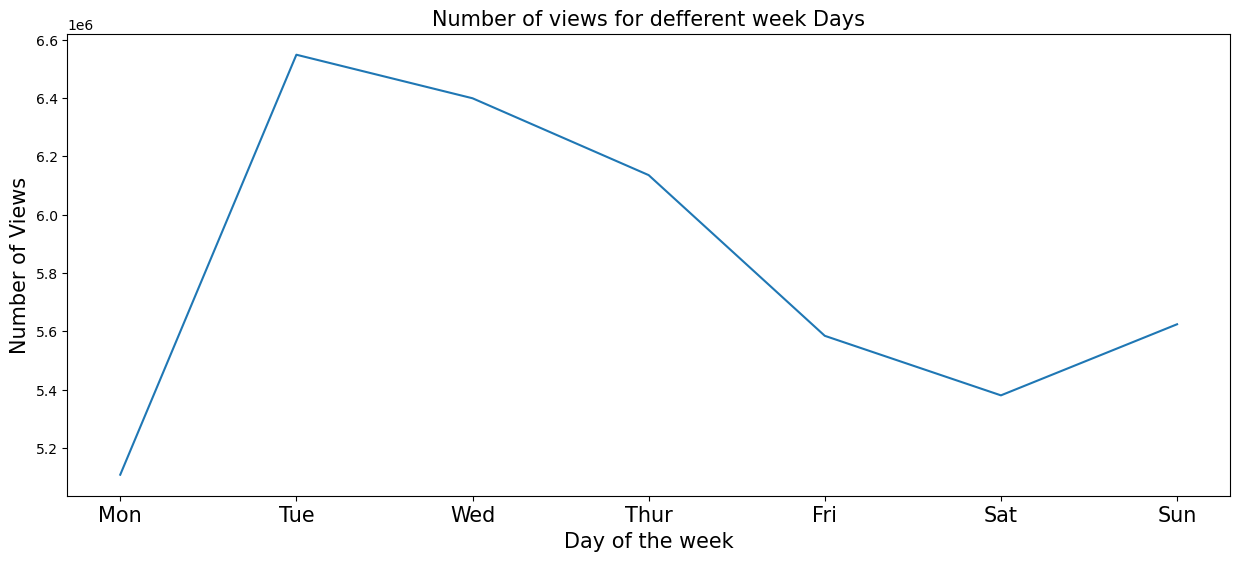

In [74]:
# plot the number views against all week days in a line chart
view_plot = viewed.groupby('event_type')['week_day'].value_counts().sort_index().plot(kind='line', figsize = (15, 6))

# set properties of the plot
view_plot.set_xlabel('Day of the week', fontsize = 15)
view_plot.set_ylabel('Number of Views', fontsize = 15)
view_plot.set_title('Number of views for defferent week Days', fontsize = 15)
view_plot.set_xticklabels((" ", 'Mon','Tue','Wed','Thur','Fri', 'Sat','Sun', " "), rotation='horizontal', fontsize=15)

# plot the graph
plt.show()

In the above graph, it can be observed that most items are viewed during the working days instead of on the weekends. This represents the aggregated number of website views for all the weekdays of October 2019.

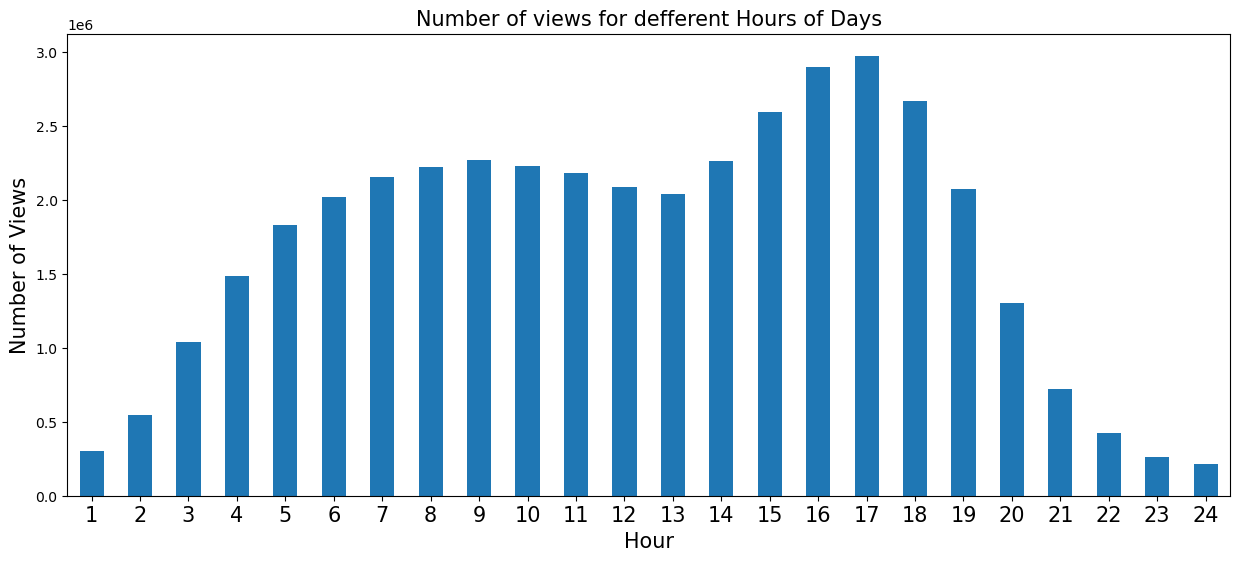

In [75]:
# plot the number views against all 24 hours of the days in a bar chart
view_plot = viewed.groupby('event_type')['hour'].value_counts().sort_index().plot(kind='bar', figsize = (15, 6))

# set properties of the plot
view_plot.set_xlabel('Hour', fontsize = 15)
view_plot.set_ylabel('Number of Views', fontsize = 15)
view_plot.set_title('Number of views for defferent Hours of Days', fontsize = 15)
view_plot.set_xticklabels(range(1, 25), rotation='horizontal', fontsize=15)

# plot the graph
plt.show()

In the above graph, it can be observed that most items are viewed in the working hours instead of the free hours. The number of views starts increasing from the start of the day, reaching their peak between **3 and 5 P.M.** Then it starts to drop. This is the combined result for each day of October 2019.

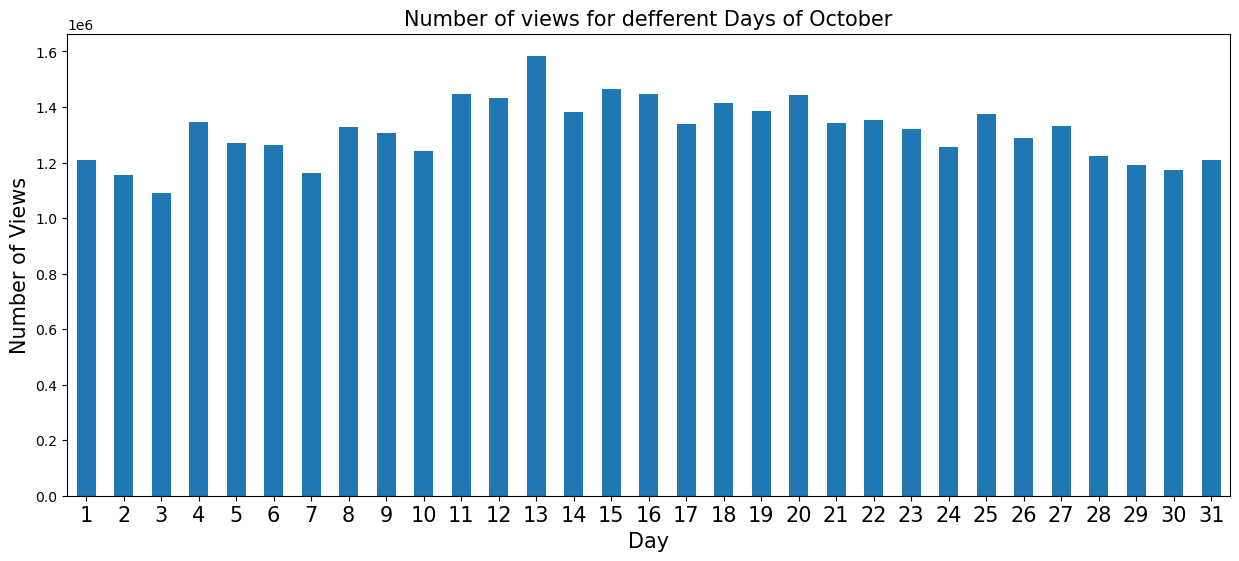

In [77]:
# plot the number views against all 24 hours of the days in a bar chart
view_plot = viewed.groupby('event_type')['day'].value_counts().sort_index().plot(kind='bar', figsize = (15, 6))

# set properties of the plot
view_plot.set_xlabel('Day', fontsize = 15)
view_plot.set_ylabel('Number of Views', fontsize = 15)
view_plot.set_title('Number of views for defferent Days of October', fontsize = 15)
view_plot.set_xticklabels(range(1, 32), rotation='horizontal', fontsize=15)

# plot the graph
plt.show()

### The hypothesis

From the above weekly and hourly analysis, it can be observed that most of the users like to browse the items during working hours of working days. Other time slots are also important but at these time slots, most resources should be allocated to the viewing or browsing component of the website to optimize and enhance user experience which in turn brings profit.

## Identifying Famous Brands and Categories
The most famous brands and categories are fetched from our dataset.

- Top brands
- Top categories
- The hypothesis

The most common problem faced by any business is inventory management. Sometimes business owners either have too much of a product that is not being sold or too little of a product whose demand is very high. This can cause a substantial loss to a company’s profits and reputation. For more information on this problem, refer [here](https://www.business2community.com/product-management/6-times-horrific-inventory-control-almost-killed-companies-01659644).

If we somehow know what products from which brands and categories are selling the most in the market, then inventory management can be optimized to some level. Here, products from which brand and category were bought the most will be determined.



### Top brands
First, the data will be read and the event_time column will be converted to DateTime format. Then, the following steps will be performed to obtain the top brands.

In [78]:
# Get rows where products are purchased
purchase = df[df['event_type'] == 'purchase']

In [80]:
# Group the DataFrame on brands
top_brands = purchase.groupby('brand')

# Get number of products bought by computing length of each grouped brand
top_brands = top_brands['brand'].agg([len])

# Sort the result on obtained length in descenging order
top_brands.sort_values('len', ascending=False, inplace=True)


In [84]:
top_brands

,len
brand,
samsung,172896
apple,142873
xiaomi,56616
huawei,23501
lucente,11578
...,...
plantex,1
playmates,1
libbey,1


According to this, **Samsung** is the most famous brand whose products are being bought in excessive quantities.

### Top categories
The same steps as above will be performed here, but instead of the `brand` column, the `category_code` column will be used.

In [85]:
# Group the DataFrame on category_code
top_catg = purchase.groupby('category_code')

# Get number of products bought by computing length of each grouped category_code
top_catg = top_catg['category_code'].agg([len])

# Sort the result on obtained length in descenging order
top_catg.sort_values('len', ascending=False, inplace=True)

In [86]:
top_catg

,len
category_code,
electronics.smartphone,338018
electronics.audio.headphone,30503
electronics.video.tv,21565
electronics.clocks,17906
appliances.kitchen.washer,16148
...,...
apparel.skirt,4
apparel.shorts,2
apparel.jumper,2


According to the above output, the **smartphone category** is the most famous among others. The difference in the number of products bought for other categories is clearly visible.

### The hypothesis

According  to the above analysis, the top brands all include mobile and mobile accessory companies. The top category is the samrtphone category, which has over **300,000**+ sales, and the other categories don't even come close to this number. It can be concluded that all products that come under the smartphone category should be in abundance in the inventory with the top five or six top brands.